In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
## Revannath Assigmnet for the Company data as decision tree

In [5]:
data = pd.read_csv('C:/Users/hp/Desktop/Revannath Data Sci/Assignments/14-Decision Tree/Company_Data.csv')

In [6]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [7]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [8]:
##import library for metaplotlib
import matplotlib.pyplot as plt

In [9]:
data[data.isnull().any(axis=1)]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [10]:
## here no null value in the given data

In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB
None


In [12]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [13]:
colnames = list(data.columns)

In [14]:
predictors = colnames[1:]

In [15]:
target = colnames[0]

In [16]:
import numpy as np

In [17]:
import seaborn as sb

In [18]:
#see the boxplot for the given data 

<AxesSubplot:>

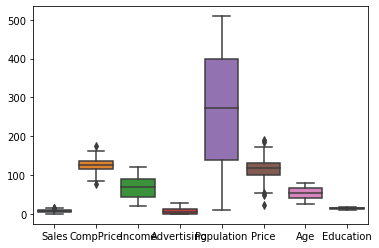

In [19]:
sb.boxplot(data = data)

In [20]:
#There are few plots with the outliers present in them so we will create a function  for finding out these outliers

In [21]:
outliers=[]

In [22]:
def detect_outlier(data_1):
    outliers.clear()
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [23]:
# Outliers present in the sales

In [24]:
outlier_sales = detect_outlier(data.Sales)

In [25]:
print(outlier_sales)

[16.27]


In [26]:
len(outlier_sales)

1

In [27]:
## Outliers present in the compprice

In [28]:
outlier_compprice = detect_outlier(data.CompPrice)

In [29]:
print(outlier_compprice)

[77, 175]


In [30]:
len(outlier_compprice)

2

In [31]:
## Outliers present in the price

In [32]:
outlier_price = detect_outlier(data.Price)

In [33]:
print(outlier_price)

[24, 191]


In [34]:
len(outlier_price)

2

In [35]:
#lets create the function which will take an index number as input and gives out 

In [36]:
#the countplot for that particular column

In [37]:
def count_plot(x):
    plot = sb.countplot(x = data.columns[x], data = data, palette = 'hls')
    return plot

In [38]:
#let us see the plot of all the columns in the data

<AxesSubplot:xlabel='Sales', ylabel='count'>

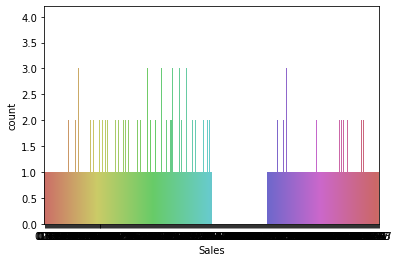

In [39]:
count_plot(0)

<AxesSubplot:xlabel='CompPrice', ylabel='count'>

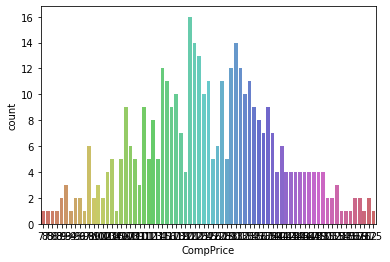

In [40]:
count_plot(1)

<AxesSubplot:xlabel='Income', ylabel='count'>

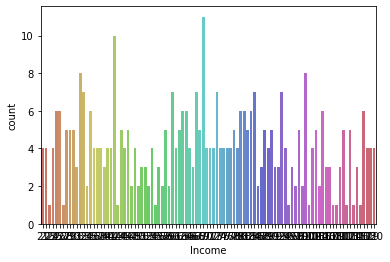

In [41]:
count_plot(2)

<AxesSubplot:xlabel='Advertising', ylabel='count'>

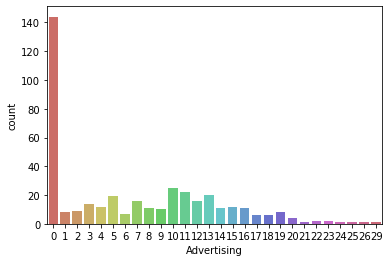

In [42]:
count_plot(3)

<AxesSubplot:xlabel='Population', ylabel='count'>

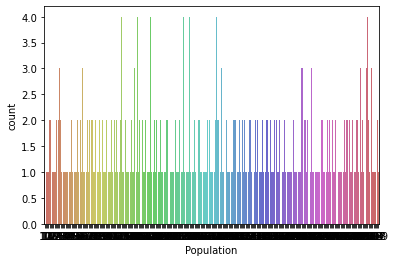

In [43]:
count_plot(4)

<AxesSubplot:xlabel='Price', ylabel='count'>

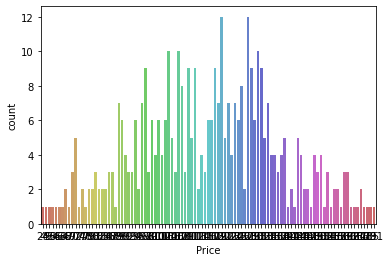

In [44]:
count_plot(5)

<AxesSubplot:xlabel='ShelveLoc', ylabel='count'>

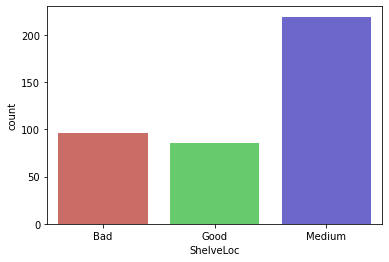

In [45]:
count_plot(6)

<AxesSubplot:xlabel='Age', ylabel='count'>

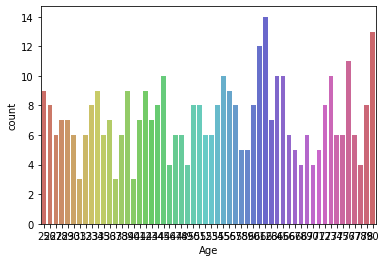

In [46]:
count_plot(7)

<AxesSubplot:xlabel='Education', ylabel='count'>

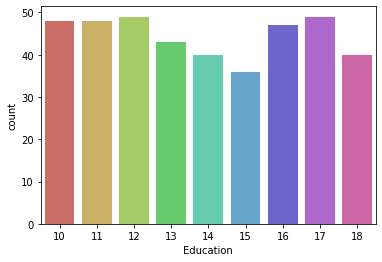

In [47]:
count_plot(8)

<AxesSubplot:xlabel='Urban', ylabel='count'>

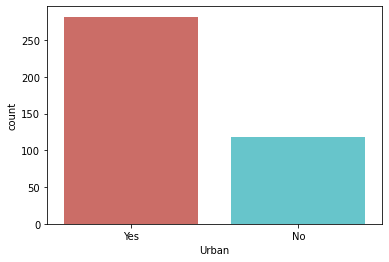

In [48]:
count_plot(9)

<AxesSubplot:xlabel='US', ylabel='count'>

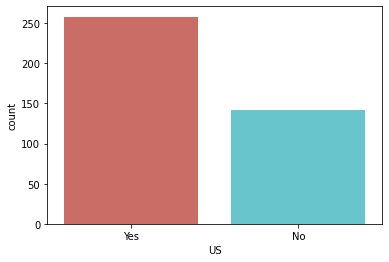

In [49]:
count_plot(10)

In [50]:
#Lets see how a plot against the sales look like

<AxesSubplot:xlabel='Sales'>

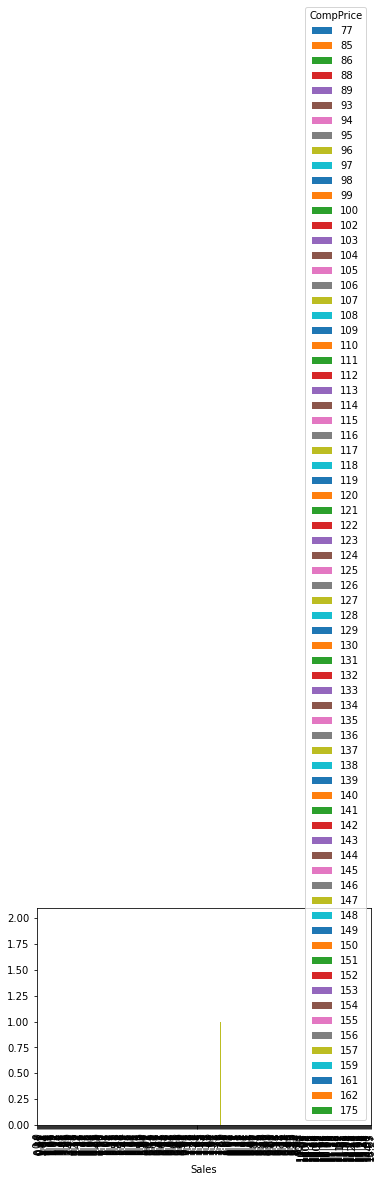

In [51]:
pd.crosstab(data.Sales,data.CompPrice).plot(kind = "bar")

<AxesSubplot:xlabel='Sales'>

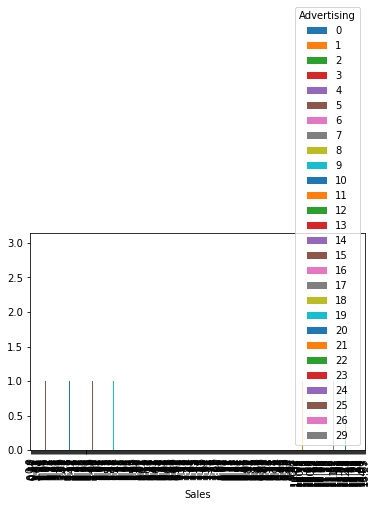

In [52]:
pd.crosstab(data.Sales,data.Advertising).plot(kind = "bar")

<AxesSubplot:xlabel='Sales'>

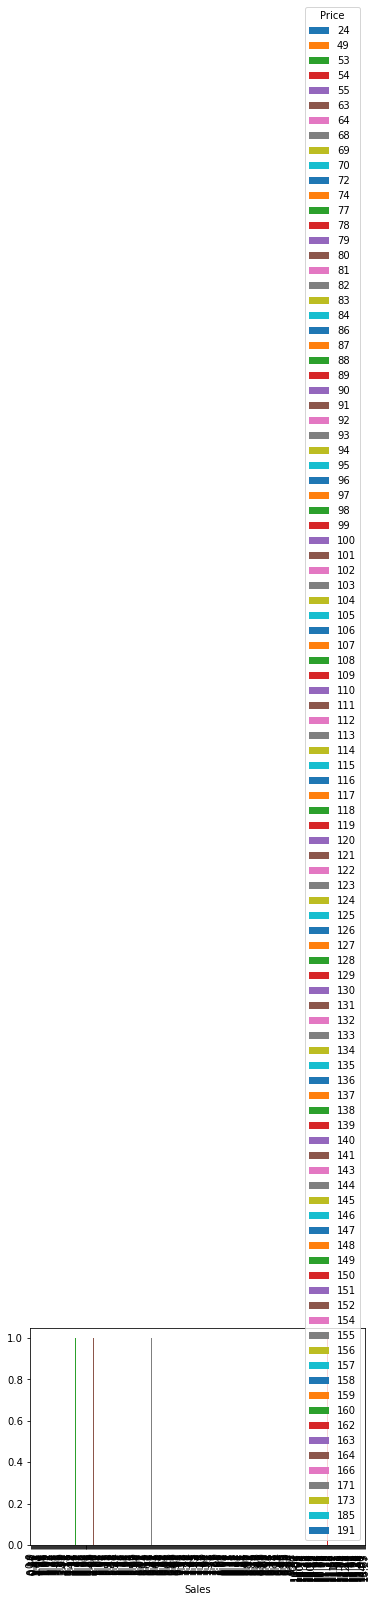

In [53]:
pd.crosstab(data.Sales,data.Price).plot(kind = "bar")

In [54]:
##Will create new DF with the encoded data since, 
##decision tree classifier can't handle the categorical string data
##first will create dictionary for the values which needs to be replaced.

In [55]:
data.dtypes## check for Data types again

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [56]:
data["ShelveLoc"].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [57]:
data["Urban"].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [58]:
data["US"].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [59]:
val_replace = {"ShelveLoc": {"Medium":2, "Bad":3, "Good":1}, "Urban": {"Yes":1, "No":0}, "US": {"Yes":1, "No":0}}

In [60]:
##Replace the vale

In [61]:
x = data.replace(val_replace).copy()

In [62]:
#x["Sales"].astype(int) ##x.dtypes

In [63]:
## will type cast the sales column values into the int because the classifier doesn't accepts floating values which it considers as countinuous values

In [64]:
model_data = x.copy()

In [65]:
model_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int64
Age              int64
Education        int64
Urban            int64
US               int64
dtype: object

In [66]:
## Let's split the data into train and test data so we can have different datas for model building and model testing.

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
train,test = train_test_split(model_data,test_size = 0.2)

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best ran

In [71]:
model = DecisionTreeClassifier(criterion = 'entropy')

In [72]:
#fitting the model with data

In [73]:
model.fit(train[predictors],train[target].astype(int))

DecisionTreeClassifier(criterion='entropy')

In [74]:
fitted_model = model.fit(train[predictors],train[target].astype(int))

In [75]:
###using casting type to traget the float and int.and predict the data

In [76]:
model.predict(test[predictors])

array([ 3,  3,  4,  6,  9,  9,  9,  6,  4,  2,  5, 11,  8,  4, 11, 10,  8,
        8,  8,  5, 10,  5,  8, 13,  8,  5,  5, 10,  5,  5, 10,  6,  6,  6,
        8,  9,  3,  6,  6,  6,  8,  7, 11,  8,  9,  4,  8, 11,  4,  7, 12,
        7,  9,  4,  7,  8,  4,  7,  9, 14,  5,  5,  7,  5,  3,  4, 11,  4,
        5,  6,  6,  6, 11, 11,  7,  7, 11,  4, 10,  2])

In [77]:
pred = pd.Series(model.predict(test[predictors]))

In [78]:
##let the plot the decision tree model for the above data 

In [79]:
from sklearn import tree

[Text(115.60209578804347, 210.645, 'X[5] <= 1.5\nentropy = 3.456\nsamples = 320\nvalue = [4, 1, 9, 16, 36, 42, 41, 41, 40, 32, 28, 16, 9\n3, 1, 1]'),
 Text(43.897010869565214, 197.055, 'X[1] <= 101.0\nentropy = 3.126\nsamples = 65\nvalue = [0, 0, 0, 1, 1, 0, 6, 8, 7, 11, 12, 11, 4, 2\n1, 1]'),
 Text(23.0175, 183.465, 'X[4] <= 99.5\nentropy = 2.892\nsamples = 54\nvalue = [0, 0, 0, 0, 1, 0, 6, 8, 4, 8, 12, 11, 2, 1\n0, 1]'),
 Text(9.461739130434783, 169.875, 'X[4] <= 92.5\nentropy = 2.288\nsamples = 13\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 5, 2, 1\n0, 1]'),
 Text(5.822608695652174, 156.285, 'X[4] <= 73.0\nentropy = 1.685\nsamples = 10\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 5, 1, 0\n0, 1]'),
 Text(2.911304347826087, 142.695, 'X[7] <= 11.0\nentropy = 1.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0\n0, 1]'),
 Text(1.4556521739130435, 129.10500000000002, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 1]'),
 Text(4.3669565217391

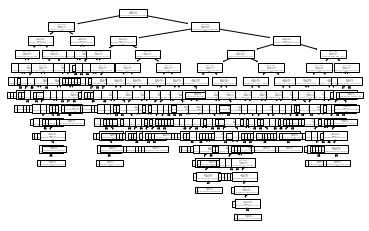

In [80]:
tree.plot_tree(fitted_model)

In [81]:
type(pred)

pandas.core.series.Series

In [82]:
print(pred)

0      3
1      3
2      4
3      6
4      9
      ..
75     7
76    11
77     4
78    10
79     2
Length: 80, dtype: int32


In [83]:
pd.Series(pred).value_counts()

5     11
6     11
8     11
4     10
7      8
11     8
9      7
10     5
3      4
2      2
12     1
13     1
14     1
dtype: int64

In [84]:
pd.crosstab(test[target],pred)

col_0,2,4,5,6,8,10,11,12
Sales,,,,,,,,
1.42,0,0,0,0,0,0,0,1
5.08,0,0,0,0,1,0,0,0
6.41,0,0,0,0,0,1,0,0
6.50,0,0,0,1,0,0,0,0
7.81,0,0,1,0,0,0,0,0
8.32,0,0,1,0,0,0,0,0
9.14,1,0,0,0,0,0,0,0
10.06,0,1,0,0,0,0,0,0
11.17,0,0,0,0,0,0,1,0


In [85]:
print(test[target])

215     2.34
174     0.00
394     5.35
20      6.41
11     11.96
       ...  
380     9.64
232    13.14
105     5.55
25     14.90
225     6.68
Name: Sales, Length: 80, dtype: float64


In [86]:
##accuracy for the train and test

In [87]:
acc = np.mean(model.predict(train[predictors]) == train[target])

In [88]:
acc

0.00625

In [89]:
accuracy = np.mean(pd.Series(train[target]).reset_index(drop = True) == pd.Series(model.predict(train[predictors])))

In [90]:
accuracy

0.00625

In [91]:
np.mean(test[target].reset_index(drop =True, inplace =True) == model.predict(test[predictors]))

0.0

In [92]:
original = (test[target])

In [93]:
predicted = pd.Series(model.predict(test[predictors]))

In [94]:
##both the programs related to the decision tree my accuracy is not getting Properly